## IMPORTING MODULES

In [2]:
import numpy as np
import pandas as pd

In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

## Choosing dataset and applying KNN algorithm

In [30]:
breast_cancer_data=datasets.load_breast_cancer()

In [31]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [32]:
clf.score(x_test,y_test)

0.9230769230769231

1 0.9178403755868545
3 0.9248826291079811
5 0.9342723004694835
7 0.92018779342723
9 0.9178403755868545
11 0.9154929577464789
13 0.9107981220657276
15 0.9131455399061034
17 0.9131455399061034
19 0.9131455399061034
21 0.9154929577464789
23 0.9154929577464789
25 0.9154929577464789


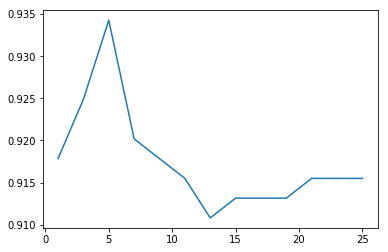

None


In [57]:
x_axis=[]
y_axis=[]
for i in range(1,26,2):
    clf=KNeighborsClassifier(algorithm='ball_tree',n_neighbors=i) # other algorithms can be ball_tree,KD_tree
    score=cross_val_score(clf,x_train,y_train,cv=KFold(n_splits=3,shuffle=True,random_state=0))
    print(i,score.mean())
    x_axis.append(i)
    y_axis.append(score.mean())
import matplotlib.pyplot as plt
plt.plot(x_axis,y_axis)
print(plt.show(x_axis,y_axis))

## Implementation from scratch

In [5]:
x_train,x_test,y_train,y_test=train_test_split(breast_cancer_data.data,breast_cancer_data.target)

In [47]:
from collections import Counter

In [54]:
def train(x,y):
    return 
def predict_one(x_train,y_train,x_test,k): # k is the number of neighbours we want to have a look at
    distances=[]
    for i in range(len(x_train)):
        distance=((x_train[i,:] - x_test)**2).sum()
        distances.append((distance,i))
    distances=sorted(distances)
    targets=[]
    for i in range(k):
        index_of_training_data=distances[i][1]
        targets.append(y_train[index_of_training_data]) # this tells with which training data do we have the minimum distance from
    # Now find the majority
    return Counter(targets).most_common()[0][0] # return class of that function
def predict(x_train,y_train,x_test_data,k):
    predictions=[]
    for x_test in x_test_data:
        predictions.append(predict_one(x_train,y_train,x_test,k))
    return predictions

In [55]:
y_pred=predict(x_train,y_train,x_test,7)
accuracy_score(y_test,y_pred)

0.916083916083916

In [56]:
a=[1,1,1,1,1,1,0,0,0]
Counter(a).most_common()[0][0]

1